<a href="https://colab.research.google.com/github/AnshRockstar/Starbucks-Customer-Segmentation/blob/main/Starbucks_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore") 

In [308]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
path="/content/drive/MyDrive/Airtribe/Portfolio.xlsx"
portfolio_df=pd.read_excel(path)

In [310]:
portfolio_df.head()

,offer_id,difficulty,offer_type,email,mobile,social,web,duration,Duration in Days
0,ae264e3637204a6fb9bb56bc8210ddfd,10,bogo,1,1,1,0,168,7
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,bogo,1,1,1,1,120,5
2,3f207df678b143eea3cee63160fa8bed,0,informational,1,1,0,1,96,4
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,bogo,1,1,0,1,168,7
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,discount,1,0,0,1,240,10


In [311]:
portfolio_df.drop(labels='duration',axis=1,inplace=True)

In [312]:
portfolio_df.rename(columns = {'Duration in Days':'Duration'}, inplace = True)

In [313]:
portfolio_df.head()

,offer_id,difficulty,offer_type,email,mobile,social,web,Duration
0,ae264e3637204a6fb9bb56bc8210ddfd,10,bogo,1,1,1,0,7
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,bogo,1,1,1,1,5
2,3f207df678b143eea3cee63160fa8bed,0,informational,1,1,0,1,4
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,bogo,1,1,0,1,7
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,discount,1,0,0,1,10


In [314]:
portfolio_df.shape

(10, 8)

In [315]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   difficulty  10 non-null     int64 
 2   offer_type  10 non-null     object
 3   email       10 non-null     int64 
 4   mobile      10 non-null     int64 
 5   social      10 non-null     int64 
 6   web         10 non-null     int64 
 7   Duration    10 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 768.0+ bytes


In [316]:
portfolio_df.dtypes

offer_id      object
difficulty     int64
offer_type    object
email          int64
mobile         int64
social         int64
web            int64
Duration       int64
dtype: object

In [317]:
portfolio_df.isna().sum()

offer_id      0
difficulty    0
offer_type    0
email         0
mobile        0
social        0
web           0
Duration      0
dtype: int64

In [318]:
profile_df=pd.read_excel("/content/drive/MyDrive/Airtribe/Profile.xlsx")
profile_df.head()

,cust_id,gender,age,became_member_on,income,days_as_member
0,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000,1230
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000,1297
2,e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000,945
3,389bc3fa690240e798340f5a15918d5c,M,65,2018-02-09,53000,1021
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,2017-11-11,51000,1111


In [319]:
profile_df.shape

(14825, 6)

In [320]:
profile_df.dtypes

cust_id                     object
gender                      object
age                          int64
became_member_on    datetime64[ns]
income                       int64
days_as_member               int64
dtype: object

In [321]:
# Convert `became_member_on` in user data to datetime and rename to `signup_date`
profile_df['income'] = profile_df.income.astype(int) # `income` in user data
profile_df['signup_date'] = pd.to_datetime(profile_df.became_member_on.astype(str))
profile_df.drop('became_member_on', axis=1, inplace=True)
profile_df.head(2)

,cust_id,gender,age,income,days_as_member,signup_date
0,0610b486422d4921ae7d2bf64640c50b,F,55,112000,1230,2017-07-15
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000,1297,2017-05-09


In [322]:
profile_df.isna().sum()

cust_id           0
gender            0
age               0
income            0
days_as_member    0
signup_date       0
dtype: int64

In [323]:
profile_df.describe()

,age,income,days_as_member
count,14825.000000,14825.000000,14825.000000
mean,54.393524,65404.991568,1376.478988
std,17.383705,21598.299410,419.205158
min,18.000000,30000.000000,854.000000
25%,42.000000,49000.000000,1062.000000
50%,55.000000,64000.000000,1212.000000
75%,66.000000,80000.000000,1651.000000
max,101.000000,120000.000000,2677.000000


In [324]:
transcation_df=pd.read_excel("/content/drive/MyDrive/Airtribe/Transcation.xlsx")
transcation_df.head()

,cust_id,event,hours_till_action,amount,reward,offer_id
0,5ecaea5c8bf44ae4a65838d9d066c909,transaction,102.0,1001.85,NaN,NaN
1,dce784e26f294101999d000fad9089bb,transaction,372.0,989.34,NaN,NaN
2,c7a5d7bab83a4d82a7f977b3d586f3d4,transaction,18.0,962.10,NaN,NaN
3,a73cf044395d46ea804f688490ad9227,transaction,36.0,947.43,NaN,NaN
4,5dfdad4241764dfe959f51b7460e42b1,transaction,108.0,936.94,NaN,NaN


In [325]:
transcation_df.shape

(197416, 6)

In [326]:
transcation_df.dtypes

cust_id               object
event                 object
hours_till_action    float64
amount               float64
reward               float64
offer_id              object
dtype: object

In [327]:
transcation_df.dtypes


cust_id               object
event                 object
hours_till_action    float64
amount               float64
reward               float64
offer_id              object
dtype: object

In [328]:
transcation_df.isna().sum()

cust_id                   0
event                     1
hours_till_action         1
amount               108795
reward               177536
offer_id              88621
dtype: int64

In [329]:
print('Overall event count:')
print(transcation_df.event.value_counts())


Overall event count:
transaction        88620
offer received     50807
offer viewed       38108
offer completed    19880
Name: event, dtype: int64


In [330]:
# Fill missing values with 0
transcation_df.fillna(0, inplace=True)
transcation_df.isnull().sum().sum()

0

In [331]:
transcation_df.head()


,cust_id,event,hours_till_action,amount,reward,offer_id
0,5ecaea5c8bf44ae4a65838d9d066c909,transaction,102.0,1001.85,0.0,0
1,dce784e26f294101999d000fad9089bb,transaction,372.0,989.34,0.0,0
2,c7a5d7bab83a4d82a7f977b3d586f3d4,transaction,18.0,962.10,0.0,0
3,a73cf044395d46ea804f688490ad9227,transaction,36.0,947.43,0.0,0
4,5dfdad4241764dfe959f51b7460e42b1,transaction,108.0,936.94,0.0,0


There is no problem with the missing values here:
For "offer received" and "offer viewed" events: no transaction was made so there shouldn't be an amount and no reward was given so there shouldn't be a reward
For "offer completed" events: no transaction was made so there shouldn't be an amount
For "transaction" events: there is no offer corresponding to transactions so there shouldn't be an offer_id or a reward
Since these values aren't actually missing values, we will be filling all of them with 0.

In [332]:
transcation_df.describe()

,hours_till_action,amount,reward
count,197416.000000,197416.000000,197416.000000
mean,250.635916,8.856980,0.498111
std,150.702379,1411.656507,1.752314
min,0.000000,0.000000,0.000000
25%,138.000000,0.000000,0.000000
50%,264.000000,0.000000,0.000000
75%,396.000000,7.030000,0.000000
max,486.000000,627162.670000,10.000000


In [333]:
print('Duplicated users:', profile_df.duplicated().sum())
print('Duplicated events:', transcation_df.duplicated().sum())

Duplicated users: 0
Duplicated events: 138


In [334]:
# Duplicated events
dup_events = transcation_df[transcation_df.duplicated(keep=False)]
dup_events.head()

,cust_id,event,hours_till_action,amount,reward,offer_id
128735,3dde94fa581145cb9f206624f1a94d5a,offer completed,168.0,0.0,2.0,2906b810c7d4411798c6938adc9daaa5
128736,3dde94fa581145cb9f206624f1a94d5a,offer completed,168.0,0.0,2.0,2906b810c7d4411798c6938adc9daaa5
129209,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,168.0,0.0,10.0,ae264e3637204a6fb9bb56bc8210ddfd
129210,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,168.0,0.0,10.0,ae264e3637204a6fb9bb56bc8210ddfd
129816,a7dc060f6fc94ca7bf71fbb188187dca,offer completed,168.0,0.0,5.0,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [335]:
# Drop duplicate events
transcation_df.drop_duplicates(inplace=True)
transcation_df.duplicated().sum()

0

In [336]:
transcation_df.shape

(197278, 6)

In [337]:
# Sort portfolio_df
portfolio_df = portfolio_df.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)
portfolio_df.head(10)

,offer_id,difficulty,offer_type,email,mobile,social,web,Duration
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,bogo,1,1,0,1,7
1,f19421c1d4aa40978ebb69ca19b0e20d,5,bogo,1,1,1,1,5
2,ae264e3637204a6fb9bb56bc8210ddfd,10,bogo,1,1,1,0,7
3,4d5c57ea9a6940dd891ad53e9dbe8da0,10,bogo,1,1,1,1,5
4,2298d6c36e964ae4a3e7e9706d1fb8c2,7,discount,1,1,1,1,7
5,fafdcd668e3743c1bb461111dcafc2a4,10,discount,1,1,1,1,10
6,2906b810c7d4411798c6938adc9daaa5,10,discount,1,1,0,1,7
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,discount,1,0,0,1,10
8,3f207df678b143eea3cee63160fa8bed,0,informational,1,1,0,1,4
9,5a8bc65990b245e5a138643cd4eb9837,0,informational,1,1,1,0,3


In [338]:
# Add the offer alias
from string import ascii_uppercase
portfolio_df['offer_alias']=[ascii_uppercase[i] for i in range(portfolio_df.shape[0])]
portfolio_df

,offer_id,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,bogo,1,1,0,1,7,A
1,f19421c1d4aa40978ebb69ca19b0e20d,5,bogo,1,1,1,1,5,B
2,ae264e3637204a6fb9bb56bc8210ddfd,10,bogo,1,1,1,0,7,C
3,4d5c57ea9a6940dd891ad53e9dbe8da0,10,bogo,1,1,1,1,5,D
4,2298d6c36e964ae4a3e7e9706d1fb8c2,7,discount,1,1,1,1,7,E
5,fafdcd668e3743c1bb461111dcafc2a4,10,discount,1,1,1,1,10,F
6,2906b810c7d4411798c6938adc9daaa5,10,discount,1,1,0,1,7,G
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,discount,1,0,0,1,10,H
8,3f207df678b143eea3cee63160fa8bed,0,informational,1,1,0,1,4,I
9,5a8bc65990b245e5a138643cd4eb9837,0,informational,1,1,1,0,3,J


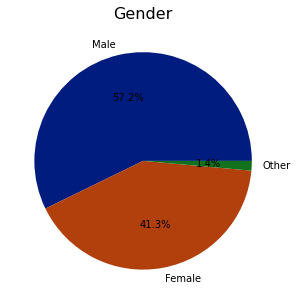

In [339]:

# declaring data
data = profile_df['gender'].value_counts()
keys = ['Male', 'Female', 'Other']
  
plt.figure(figsize = (5,5))
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%1.1f%%')
plt.title('Gender', fontsize = 16) 
# displaying chart
plt.show()

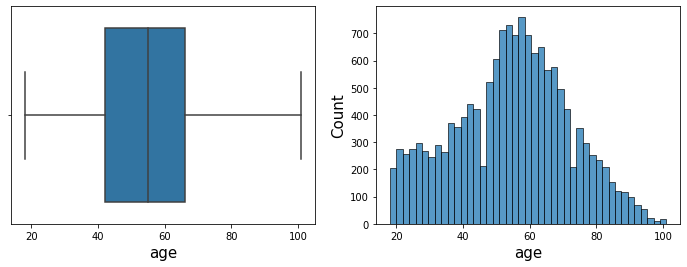

In [340]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = profile_df, x = 'age', ax = axs[0])
sns.histplot(data = profile_df, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)


In [341]:
print(profile_df.age.max())
print(profile_df.age.min())
profile_df.shape

101
18


(14825, 6)

In [342]:
age_groups=pd.cut(profile_df['age'],
      bins = [profile_df['age'].min(), 26, 36, 46, 56, 66, 76, 86, profile_df['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])

In [343]:
age_group_percentage = (age_groups.value_counts().sort_index() / profile_df.shape[0] * 100).round(1)

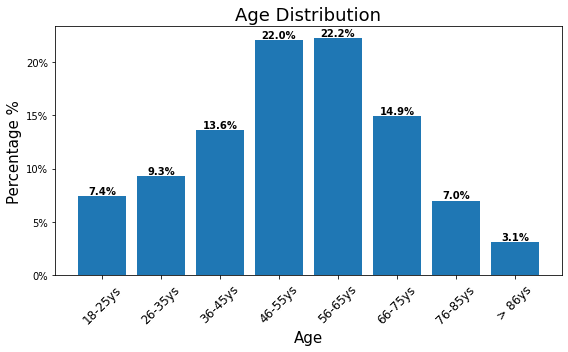

In [344]:
plt.figure(figsize = (8, 5))
yticklabels = [str(y) + '%' for y in np.arange(0,25,5)]
plt.yticks(np.arange(0,25,5), labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)

bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

## Income

In [345]:
profile_df.columns

Index(['cust_id', 'gender', 'age', 'income', 'days_as_member', 'signup_date'], dtype='object')

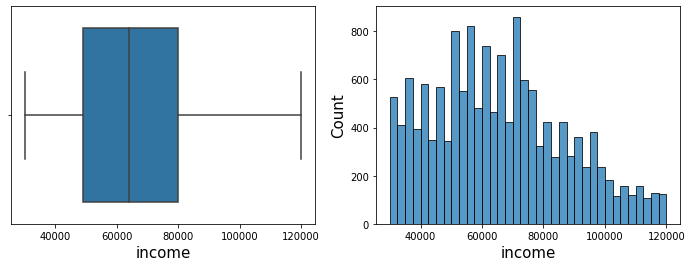

In [346]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = profile_df, x = 'income', ax = axs[0])
sns.histplot(data = profile_df, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)


In [347]:
print(profile_df.income.min())
print(profile_df.income.max())
profile_df.income.value_counts().reset_index()

30000
120000


,index,income
0,73000,314
1,72000,297
2,71000,294
3,57000,288
4,53000,282
...,...,...
86,116000,46
87,107000,45
88,112000,45
89,117000,32


In [348]:
income_group=pd.cut(profile_df['income'],
      bins = [profile_df['income'].min(), 45000, 60000, 75000,90000, 105000, profile_df['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k','>105k'])
# Visualize customers by age groups
income_group_percentage = (income_group.value_counts().sort_index() / profile_df.shape[0] * 100).round(1)

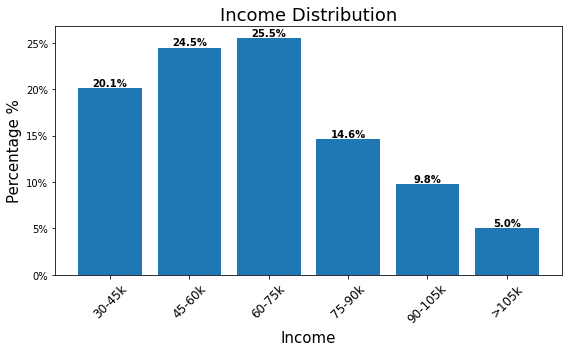

In [349]:

plt.figure(figsize = (8, 5))
yticklabels = [str(y) + '%' for y in np.arange(0,30,5)]
plt.yticks(np.arange(0,30,5), labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Income', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution', fontsize = 18)

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

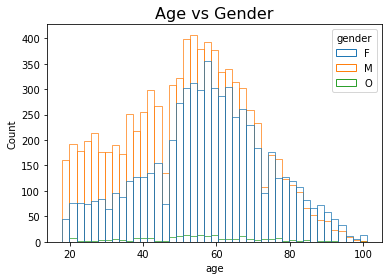

In [350]:
sns.histplot(data = profile_df, x = 'age', hue = 'gender', fill = False)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

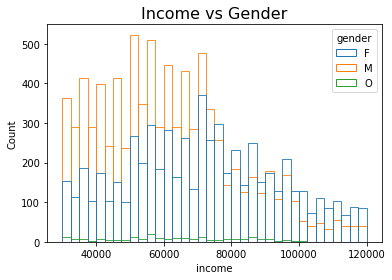

In [351]:
sns.histplot(data = profile_df, x = 'income', hue = 'gender', fill = False)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

In [355]:
# Extract the year,month,week from the became_member_on feature

profile_df['year'] = profile_df['signup_date'].dt.year
profile_df['month'] = profile_df['signup_date'].dt.month
profile_df['day']=profile_df['signup_date'].dt.day_name()
profile_df['member_since_how_manydays'] = (pd.to_datetime('today') - profile_df['signup_date']).astype('timedelta64[D]').astype(int)



In [356]:
profile_df.head()

,cust_id,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
0,0610b486422d4921ae7d2bf64640c50b,F,55,112000,1230,2017-07-15,2017,7,Saturday,2009
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000,1297,2017-05-09,2017,5,Tuesday,2076
2,e2127556f4f64592b11af22de27a7932,M,68,70000,945,2018-04-26,2018,4,Thursday,1724
3,389bc3fa690240e798340f5a15918d5c,M,65,53000,1021,2018-02-09,2018,2,Friday,1800
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,51000,1111,2017-11-11,2017,11,Saturday,1890


##Member growth by year

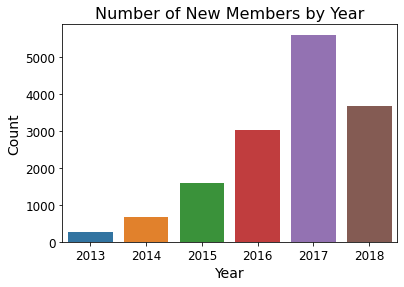

In [357]:
sns.countplot(data = profile_df, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

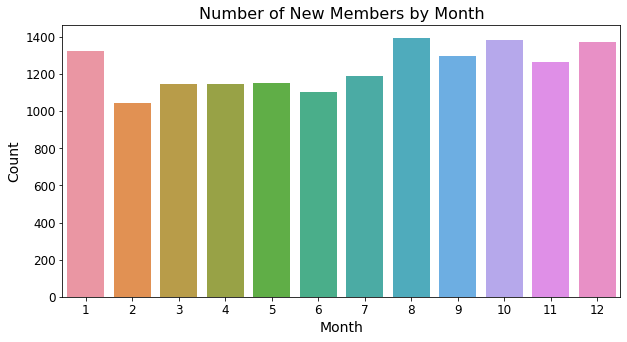

In [358]:
plt.figure(figsize = (10,5))
sns.countplot(data = profile_df.sort_values('month'), x = 'month')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Month', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

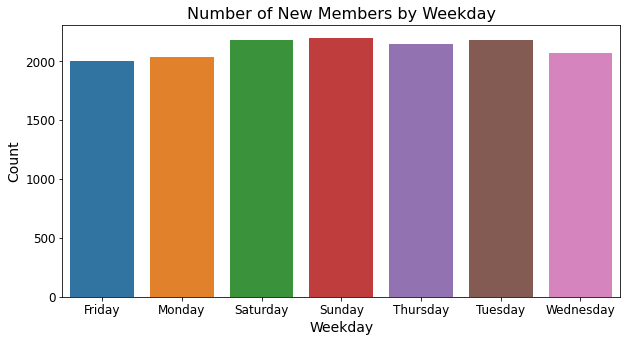

In [359]:
plt.figure(figsize = (10,5))
sns.countplot(data = profile_df.sort_values('day'), x = 'day')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Weekday', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

email  mobile  social  web
1      0       0       1      1
       1       0       1      3
               1       0      2
                       1      4
dtype: int64


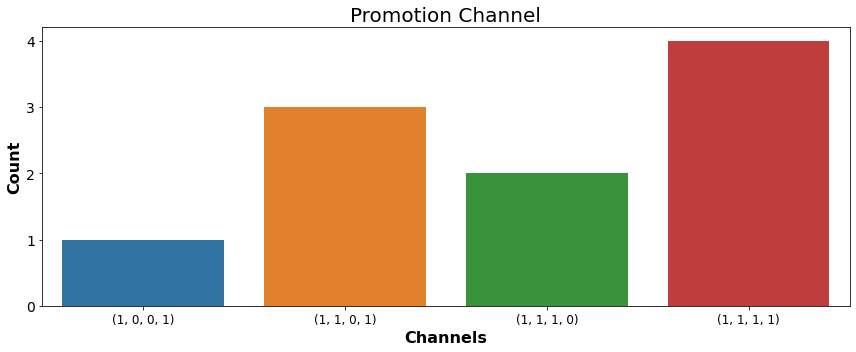

In [360]:
p = portfolio_df[["email", "mobile","social","web"]].groupby(["email", "mobile","social","web"]).size()
print(p)
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

In [361]:
transcation_df['event'].value_counts()

transaction        88620
offer received     50807
offer viewed       38108
offer completed    19742
0                      1
Name: event, dtype: int64

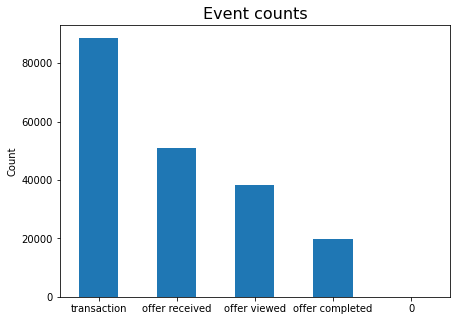

In [362]:
fig = plt.figure(figsize = (7,5))
transcation_df['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 16)
plt.show()

In [363]:
transcation_df.head()

,cust_id,event,hours_till_action,amount,reward,offer_id
0,5ecaea5c8bf44ae4a65838d9d066c909,transaction,102.0,1001.85,0.0,0
1,dce784e26f294101999d000fad9089bb,transaction,372.0,989.34,0.0,0
2,c7a5d7bab83a4d82a7f977b3d586f3d4,transaction,18.0,962.10,0.0,0
3,a73cf044395d46ea804f688490ad9227,transaction,36.0,947.43,0.0,0
4,5dfdad4241764dfe959f51b7460e42b1,transaction,108.0,936.94,0.0,0


In [364]:
transcation_df.columns

Index(['cust_id', 'event', 'hours_till_action', 'amount', 'reward',
       'offer_id'],
      dtype='object')

In [365]:
profile_df.head()

,cust_id,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
0,0610b486422d4921ae7d2bf64640c50b,F,55,112000,1230,2017-07-15,2017,7,Saturday,2009
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000,1297,2017-05-09,2017,5,Tuesday,2076
2,e2127556f4f64592b11af22de27a7932,M,68,70000,945,2018-04-26,2018,4,Thursday,1724
3,389bc3fa690240e798340f5a15918d5c,M,65,53000,1021,2018-02-09,2018,2,Friday,1800
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,51000,1111,2017-11-11,2017,11,Saturday,1890


In [366]:
# Add column `days_since_start`
transcation_df = transcation_df.assign(days_since_start = transcation_df['hours_till_action']/24).astype({'days_since_start': 'int64'})
print('The minimum and the maximum of days_since_start: {} and {}'.format(transcation_df['days_since_start'].min(), transcation_df['days_since_start'].max()))


The minimum and the maximum of days_since_start: 0 and 20


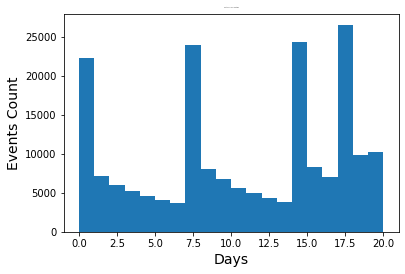

In [367]:
plt.hist(transcation_df['days_since_start'], bins = 20)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)
plt.show()

In [368]:
transcation_df[transcation_df['event'] == 'offer received'].groupby('hours_till_action').count()

,cust_id,event,amount,reward,offer_id,days_since_start
hours_till_action,,,,,,
0.0,12649,12649,12649,12649,12649,12649
168.0,12669,12669,12669,12669,12669,12669
336.0,12711,12711,12711,12711,12711,12711
408.0,12778,12778,12778,12778,12778,12778


In [369]:
transcation_df[transcation_df['event'] == 'offer completed'].groupby('hours_till_action').count()

,cust_id,event,amount,reward,offer_id,days_since_start
hours_till_action,,,,,,
0.0,206,206,206,206,206,206
6.0,276,276,276,276,276,276
12.0,280,280,280,280,280,280
18.0,252,252,252,252,252,252
24.0,265,265,265,265,265,265
...,...,...,...,...,...,...
462.0,353,353,353,353,353,353
468.0,340,340,340,340,340,340
474.0,299,299,299,299,299,299


In [370]:
# Find how many events occurred in each hour
viewed_hourly = transcation_df[transcation_df['event'] == 'offer viewed'].value_counts('hours_till_action').sort_index()
completed_hourly = transcation_df[transcation_df['event'] == 'offer completed'].value_counts('hours_till_action').sort_index()
transaction_hourly = transcation_df[transcation_df['event'] == 'transaction'].value_counts('hours_till_action').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

82 82 82


Text(0.5, 1.0, 'Events Occurrence Hourly')

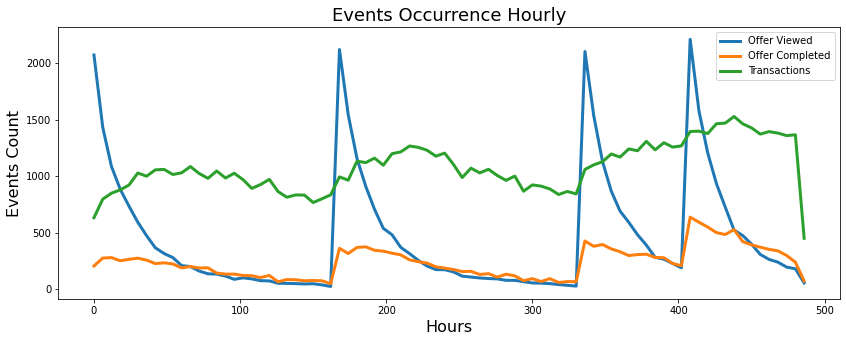

In [371]:
# Visualize
hours = viewed_hourly.index.values
plt.figure(figsize=(14, 5))
# axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
plt.plot(hours, viewed_hourly, lw = 3)
plt.plot(hours, completed_hourly, lw = 3)
plt.plot(hours, transaction_hourly, lw = 3)
plt.legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
plt.xlabel('Hours', fontsize = 16)
plt.ylabel('Events Count', fontsize = 16)
plt.title('Events Occurrence Hourly', fontsize = 18)

In [372]:
# Find how many events occurred from 0 to 20 days
viewed_daily = transcation_df[transcation_df['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
completed_daily = transcation_df[transcation_df['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
transaction_daily = transcation_df[transcation_df['event'] == 'transaction'].value_counts('days_since_start').sort_index()
print(len(viewed_daily), len(completed_daily), len(transaction_daily))

21 21 21


Text(0.5, 1.0, 'Events Occurrence Daily')

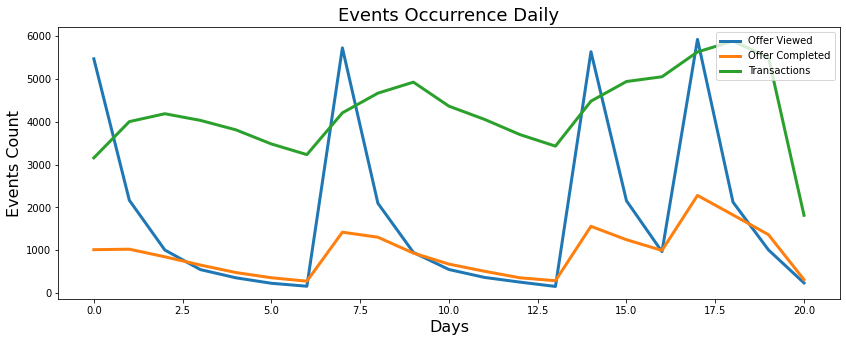

In [373]:
# Visualize
days = viewed_daily.index.values
plt.figure(figsize=(14, 5))
# axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
plt.plot(days, viewed_daily, lw = 3)
plt.plot(days, completed_daily, lw = 3)
plt.plot(days, transaction_daily, lw = 3)
plt.legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Events Count', fontsize = 16)
plt.title('Events Occurrence Daily', fontsize = 18)

In [374]:
transcation_df.columns

Index(['cust_id', 'event', 'hours_till_action', 'amount', 'reward', 'offer_id',
       'days_since_start'],
      dtype='object')

In [375]:
portfolio_df.columns

Index(['offer_id', 'difficulty', 'offer_type', 'email', 'mobile', 'social',
       'web', 'Duration', 'offer_alias'],
      dtype='object')

**which Offer were Popular**

In [376]:
# Create a df that only contains events about offers
df_event = transcation_df[~(transcation_df['event'] == 'transaction')]

# Merge df_event with and offers
event_offer = pd.merge(df_event,portfolio_df, left_on = 'offer_id', right_on = 'offer_id').drop('offer_id', axis = 1)

# Reorder columns of the merged df
col_names = ['cust_id', 'event', 'offer_alias', 'reward',
       'email','mobile','social','web', 'difficulty', 'Duration', 'offer_type', 'hours_till_action', 'days_since_start']
event_offer = event_offer[col_names]


In [377]:
event_offer.sample(3)

,cust_id,event,offer_alias,reward,email,mobile,social,web,difficulty,Duration,offer_type,hours_till_action,days_since_start
70607,949c1dc445584287852cce6b8bbd2803,offer received,E,0.0,1,1,1,1,7,7,discount,168.0,7
98105,c9bd645c89ff4a768f53ae84c48da8f7,offer viewed,C,0.0,1,1,1,0,10,7,bogo,420.0,17
105103,449998edcac44f3b82af0af9f36aedc7,offer received,J,0.0,1,1,1,0,0,3,informational,336.0,14


In [378]:
# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

In [379]:
print(p0,p2)

offer_alias
C    5134
H    5133
G    5125
I    5093
A    5090
J    5085
D    5046
E    5046
F    5033
B    5022
dtype: int64 offer_alias
F    3134
E    3051
B    2672
A    2519
G    2298
C    2220
D    2043
H    1805
dtype: int64


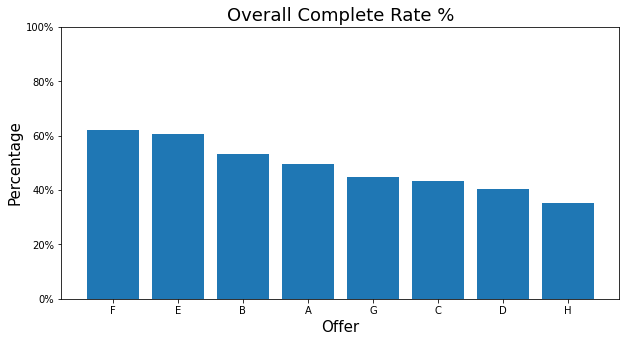

In [380]:
# Overall completion rate of each offer
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)

# Visualize
plt.figure(figsize=(10,5))
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

In this section we tackle the following:

Validate the viewed, completed and recieved offers and create customer transactions and stats.

Create RFM Clusters.

Handle missing values for age, gender and income.

Handle categorical variables.

Remove unnecessary columns for the analysis

Handling the offers events and the transactions
In this section. we need to validate the transactions that occurred as a result of viewing the offer or it is an independent event.

As have been discussed before in the data understanding section regarding the offer completion. We need to confirm for each user if the user has viewed and completed the offer within the validity period while handling the issue of missing offer_id with the transaction event and the missing offer complete event with the informational offers.

The offers is considered completed:

BOGO and discount offers: offer_time_recieved < offer_time_viewed < transaction_time < offer_time_completed < offer_end_time (within the time validaity)

Informational offers: offer_time_recieved < offer_time_viewed < transaction_time < offer_end_time

After finding the effective offers. we can split the customers into 4 groups:

1) people who responded to offers and completed an offer (TR)

2) people who viewed an offer but did not complete the offer(TN)

3) people who have not recieved an offer or have not viewed the offer and have not made a completed the offer(CN)

4) people who have not recieved an offer or have not viewed the offer but have completed the offer(CR)

In [381]:
# merge the offer with offer portofolio 
transcript_df = transcation_df.merge(portfolio_df, on ='offer_id', how='left')
transcript_df.head()

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
0,5ecaea5c8bf44ae4a65838d9d066c909,transaction,102.0,1001.85,0.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dce784e26f294101999d000fad9089bb,transaction,372.0,989.34,0.0,0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c7a5d7bab83a4d82a7f977b3d586f3d4,transaction,18.0,962.10,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a73cf044395d46ea804f688490ad9227,transaction,36.0,947.43,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5dfdad4241764dfe959f51b7460e42b1,transaction,108.0,936.94,0.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
transcript_df[transcript_df.event !='transaction'].sort_values(['cust_id', 'hours_till_action'])

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
116697,25656382424241000719757931970560.0,offer received,168.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,7,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
138751,25656382424241000719757931970560.0,offer viewed,210.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,8,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
143174,25656382424241000719757931970560.0,offer completed,288.0,0.0,2.0,2906b810c7d4411798c6938adc9daaa5,12,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
144979,25656382424241000719757931970560.0,offer received,336.0,0.0,0.0,5a8bc65990b245e5a138643cd4eb9837,14,0.0,informational,1.0,1.0,1.0,0.0,3.0,J
161991,25656382424241000719757931970560.0,offer viewed,348.0,0.0,0.0,5a8bc65990b245e5a138643cd4eb9837,14,0.0,informational,1.0,1.0,1.0,0.0,3.0,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162964,ffff82501cea40309d5fdd7edcca4a07,offer viewed,354.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,14,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
167515,ffff82501cea40309d5fdd7edcca4a07,offer completed,384.0,0.0,2.0,2906b810c7d4411798c6938adc9daaa5,16,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
170850,ffff82501cea40309d5fdd7edcca4a07,offer received,408.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,17,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
185298,ffff82501cea40309d5fdd7edcca4a07,offer viewed,414.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,17,10.0,discount,1.0,1.0,0.0,1.0,7.0,G


In [383]:
transcript_df[(transcript_df.event !='transaction') & (transcript_df.cust_id=='0009655768c64bdeb2e877511632db8f')].sort_values(['cust_id', 'hours_till_action'])

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
118668,0009655768c64bdeb2e877511632db8f,offer received,168.0,0.0,0.0,5a8bc65990b245e5a138643cd4eb9837,7,0.0,informational,1.0,1.0,1.0,0.0,3.0,J
135933,0009655768c64bdeb2e877511632db8f,offer viewed,192.0,0.0,0.0,5a8bc65990b245e5a138643cd4eb9837,8,0.0,informational,1.0,1.0,1.0,0.0,3.0,J
146915,0009655768c64bdeb2e877511632db8f,offer received,336.0,0.0,0.0,3f207df678b143eea3cee63160fa8bed,14,0.0,informational,1.0,1.0,0.0,1.0,4.0,I
166136,0009655768c64bdeb2e877511632db8f,offer viewed,372.0,0.0,0.0,3f207df678b143eea3cee63160fa8bed,15,0.0,informational,1.0,1.0,0.0,1.0,4.0,I
172221,0009655768c64bdeb2e877511632db8f,offer received,408.0,0.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,17,5.0,bogo,1.0,1.0,1.0,1.0,5.0,B
185535,0009655768c64bdeb2e877511632db8f,offer completed,414.0,0.0,5.0,f19421c1d4aa40978ebb69ca19b0e20d,17,5.0,bogo,1.0,1.0,1.0,1.0,5.0,B
194502,0009655768c64bdeb2e877511632db8f,offer viewed,456.0,0.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,19,5.0,bogo,1.0,1.0,1.0,1.0,5.0,B


In [384]:
all_offers = transcript_df.sort_values(['cust_id', 'hours_till_action'])
all_offers.head()

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
116697,25656382424241000719757931970560.0,offer received,168.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,7,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
138751,25656382424241000719757931970560.0,offer viewed,210.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,8,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
38837,25656382424241000719757931970560.0,transaction,288.0,11.2,0.0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143174,25656382424241000719757931970560.0,offer completed,288.0,0.0,2.0,2906b810c7d4411798c6938adc9daaa5,12,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
144979,25656382424241000719757931970560.0,offer received,336.0,0.0,0.0,5a8bc65990b245e5a138643cd4eb9837,14,0.0,informational,1.0,1.0,1.0,0.0,3.0,J


In [385]:
def split_transcation_on_event(transcript_df):
    """
        This Method splits the transcripts dataframe into 4 dataframes based on the event type
        Args:
            transcation_df(pd.DataFrame): Dataframe for the transcations
        Returns:
            transactions(pd.DataFrame): contains the transaction events 
            viewed_offers(pd.DataFrame): contains the viewed events 
            recieved_offers(pd.DataFrame): contains the recieved events 
            completed_offers(pd.DataFrame): contains the completed events 
    """
    received = transcript_df[transcript_df.event == 'offer received']
    completed = transcript_df[transcript_df.event == 'offer completed']
    viewed = transcript_df[transcript_df.event == 'offer viewed']
    transactions = transcript_df[transcript_df.event == 'transaction']
    
    return received, completed, viewed, transactions

In [386]:
received, completed, viewed, transactions = split_transcation_on_event(transcript_df)

In [387]:
received.head()

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias
88620,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.0,627162.67,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5.0,bogo,1.0,1.0,0.0,1.0,7.0,A
88621,a03223e636434f42ac4c3df47e8bac43,offer received,0.0,0.00,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,20.0,discount,1.0,0.0,0.0,1.0,10.0,H
88622,e2127556f4f64592b11af22de27a7932,offer received,0.0,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,10.0,discount,1.0,1.0,0.0,1.0,7.0,G
88623,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.0,0.00,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,10.0,discount,1.0,1.0,1.0,1.0,10.0,F
88624,68617ca6246f4fbc85e91a2a49552598,offer received,0.0,0.00,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,10.0,bogo,1.0,1.0,1.0,1.0,5.0,D


In [388]:
def create_split_offers_df(transcript_df):
    """
    
        split the offers, add and remove unnecessary columns from dataframes
    """
    received, completed, viewed, transactions = split_transcation_on_event(transcript_df)
    
    received.rename(columns={'hours_till_action':'time_received'}, inplace=True)
    
    received.drop(columns=['event', 'amount','days_since_start'], inplace=True, axis =1)
    
    # add expected finish time to the received data frame
    # duration is in days while time is in hours
    received['expected_finish'] = received.time_received + received.Duration * 24
    
    drop_cols = ['event', 'difficulty', 'Duration', 'offer_type', 'reward',\
                'email', 'mobile', 'social', 'web', 'amount','days_since_start']
    viewed.rename(columns={'hours_till_action':'time_viewed'}, inplace=True)
    viewed.drop(columns=drop_cols, inplace=True, axis =1)

    
    drop_cols = ['event', 'difficulty', 'Duration', 'offer_type', 'reward',\
                'email', 'mobile', 'social', 'web', 'amount','days_since_start']
    completed.rename(columns={'hours_till_action':'time_completed'}, inplace=True)
    completed.drop(columns=drop_cols, inplace=True, axis =1)
    drop_cols = ['event', 'difficulty', 'Duration', 'offer_type', 'reward',\
                'email', 'mobile', 'social', 'web','offer_id','days_since_start'] 
    transactions.rename(columns={'hours_till_action':'transaction_time'}, inplace=True)
    transactions.drop(columns=drop_cols, inplace=True, axis =1)

    return received, completed, viewed, transactions

In [389]:
received, completed, viewed, transactions=create_split_offers_df(transcript_df)
received.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,Duration,offer_alias,expected_finish
88620,78afa995795e4d85b5d9ceeca43f5fef,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,7.0,A,168.0
88621,a03223e636434f42ac4c3df47e8bac43,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,discount,1.0,0.0,0.0,1.0,10.0,H,240.0
88622,e2127556f4f64592b11af22de27a7932,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,7.0,G,168.0
88623,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,10.0,discount,1.0,1.0,1.0,1.0,10.0,F,240.0
88624,68617ca6246f4fbc85e91a2a49552598,0.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,bogo,1.0,1.0,1.0,1.0,5.0,D,120.0


In [390]:
def completed_set(recieved_row, completed):
    """
        This method returns completed and the offer completion time
        Args:
            recieved_row: dataframe containing received events
            completed: dataframe containing completed events
        Returns:
            completed_flag : 1 if the offer was completed on time
            expected_finish: offer completion time
        
    """
    completed_flag = 0
    finish_time_flag = recieved_row.expected_finish
    
    completed_set = completed[(completed.offer_id == recieved_row.offer_id) &
                               (completed.time_completed >= recieved_row.time_received) &
                               (completed.time_completed <= recieved_row.expected_finish)]
    if(len(completed_set)>0):
        completed_flag = 1
        finish_time_flag = completed_set.time_completed.iloc[0]
    return pd.Series([completed_flag, finish_time_flag], index=['completed','finish'])

In [391]:
def viewed_set(row_received,viewed):
    """
        This method returns viewed, offer view time and success 
        A transaction is considered successful if it was completed and viewed within the offer duration
        if it was viewed before rhe completion time (finish) that mean it was completed before being viewed 
        Args:
            recieved_row: dataframe containing completed events
            completed: dataframe containing completed events
        Returns:
            viewed : 1 if the offer was viewed
            view_time: offer view time
            success: succesful offer
    """
    viewed_flag = 0
    view_time = np.nan
    success = 0
    
    viewed_set = viewed[(viewed.offer_id == row_received.offer_id) &
                   (viewed.time_viewed >= row_received.time_received) &
                   (viewed.time_viewed <= row_received.finish)]
    if(len(viewed_set)>0):
        viewed_flag = 1
        view_time = viewed_set.time_viewed.iloc[0]
        success = 1 if row_received.completed else 0
        
    return pd.Series([viewed_flag, success, view_time], index=['viewed','success', 'view_time'])     

In [392]:
def handle_completed_recieved(received, completed):
    """
        This Method takes the recieved offers and the compeleted offers 
        then returns completed an finish time 
        Args:
            recieved: dataframe containing received events
            completed: dataframe containing completed events
        Returns:
            recieved dataframe updated with the completed and offer finish time
    """
    
    recieved_updated = received.copy()
    recieved_updated[['completed','finish']] = recieved_updated.apply(lambda row: completed_set(row, completed), axis=1)
    return recieved_updated

In [393]:
def handle_viewed_completed(received_modified, viewed):
    """
        This Method takes the updated recieved dataframe and the viewed offers 
        then returns successful offers, viewed, and offer view time
        Args:
            recieved: dataframe containing received events
            completed: dataframe containing completed events
        Returns:
            recieved dataframe updated with the completed and offer finish time
    """
    viewed_updated = received_modified.copy()
    viewed_updated[['viewed','success', 'view_time']] = viewed_updated.apply(lambda row: viewed_set(row, viewed), axis=1)
    
    return viewed_updated

In [394]:
def handle_completed_not_viewed(viewed):
    """
        This Method takes the updated recieved dataframe 
        then returns completed_not viewed offers
        (offers that have been completed but are not viewed nor successful)
        Args:
            recieved: dataframe containing received events
            completed: dataframe containing completed events
        Returns:
            recieved dataframe updated with the completed and offer finish time
    """
    viewed_modified = viewed.copy()
    viewed_modified['completed_not_viewed'] = 0
    condition = (viewed_modified.completed==1) & (viewed_modified.viewed==0) & (viewed_modified.success==0)
    viewed_modified.loc[condition,'completed_not_viewed'] = 1
    
    return viewed_modified

def get_successful_informational_transactions(row, transactions):
    """
      This Method takes the updated merged recieved and the viewed for informational offers 
        then find completed offers from these
        Args:
            row: merged received and viewed offers 
            transactions: dataframe containing transactions
        Returns:
            success if the transaction was compeleted during the promotion period
    """  
    transaction_condition = (transactions.transaction_time >=row.time_received) & ((transactions.transaction_time <=row.expected_finish))
    success = 1 if len(transactions[transaction_condition] ) > 0 else 0
    return pd.Series([success],index =['success'] )
        
def handle_informational_offers(transactions, data):
    """
    This function handles the case of informational offers since it does not have offer completed event
    viewed offers and transaction within the 
    Args:
            transactions customer transactions dataframe
            received offers dataframe 
            viewed offers dataframe
    Returns:
        viewed , success  
    """
    
    
    # we want informational offers that conform with the following condition
    # time_received <= time_viewed <= offer duration
    data_modified = data.copy()
    validation_condition = (data_modified.viewed == 1)&\
                           (data_modified.offer_type=='informational')
    
    # get the transactions within the condition time 
    data_modified.loc[validation_condition,'success'] = data_modified[validation_condition].apply(lambda row: get_successful_informational_transactions(row, transactions), axis=1)
    
    data_modified.loc[validation_condition,'completed'] = data_modified.loc[validation_condition,'success']
    
    return data_modified

def get_transaction_stats(row, transactions):
    """
        This function gets the summary for each offer 
        - sums all amount of transactions during the offer time 
        - get the offer_profit of offer
        - non offer transactions sum
        - assume for non offer transaction that the amount of profit ==non offer sum
    """     
    total_spent_offer = 0
    total_spent_non_offer = 0
    profit = 0
    # non offer profit is the amount spent 
    # if the offer is success the spent sum transactions from view_time till expected finish
    if row.viewed == 1:
        transactions_offer = transactions[(transactions.transaction_time>= row.view_time ) & (transactions.transaction_time<= row.expected_finish )]
        total_spent_offer =  transactions_offer.amount.sum()
        transactions_non_offer = transactions[(transactions.transaction_time < row.view_time ) & (transactions.transaction_time >= row.time_received )]
        total_spent_non_offer =  transactions_non_offer.amount.sum()
        cost = row.reward if row.completed == 1 else 0
        profit = total_spent_offer - cost
    else:
        transactions_non_offer = transactions[(transactions.transaction_time>= row.time_received ) & (transactions.transaction_time<= row.expected_finish )]
        total_spent_non_offer =  transactions_non_offer.amount.sum()
        cost = row.reward if row.completed == 1 else 0
        profit = total_spent_non_offer - cost
        
    total_spent = total_spent_non_offer + total_spent_offer            
    return pd.Series([total_spent_offer, total_spent_non_offer, profit, total_spent],index =['total_spent_offer','total_spent_non_offer','profit', 'total_spent'] )

def enhance_transaction_df(transactions, offers):
    """
        This function calculates the customer amount spent during offer, profit_offer, non_offer perios
        
    """
    transaction_updated = offers.copy()
    transaction_updated[['total_spent_offer','total_spent_non_offer','profit', 'total_spent']] = transaction_updated.apply(lambda row: get_transaction_stats(row, transactions), axis=1)    
    return transaction_updated

def get_has_profit(row):
    """
        This method returns if this transaction has profit or no 
    """
    has_profit = 1 if (( row.viewed == 1 and row.profit > 0) or (row.viewed == 0 and row.total_spent_non_offer > 0)) else 0
    return pd.Series([has_profit],index =['has_profit'] )

def get_completed_offer(row):
    """
        This method returns if this offer was completed or not 
    """
    completed_offer = 1 if (( row.completed == 1 ) or (row.completed_not_viewed == 1)) else 0
    return pd.Series([completed_offer],index =['completed_offer'] )

def get_user_stats(offers):
    """
        This function gets the summary for each offer 
        - get the number of bogo completed, num of completed offers, num of compelted discounts
        - has_profit if the profit more than 0 for non offer if it is more than 1 then it an offer
    """
    offers_modified = offers.copy()
    offers_modified['num_bogo_completed'] = [offers_modified[offers_modified.offer_type=='bogo']['completed'].sum()] * len(offers_modified)
    offers_modified['num_discount_completed'] = [offers_modified[offers_modified.offer_type=='discount']['completed'].sum()] * len(offers_modified)    
    offers_modified['num_informational_completed'] = [offers_modified[offers_modified.offer_type=='informational']['completed'].sum()] * len(offers_modified)
    offers_modified['successful_offers'] = [offers_modified['success'].sum()] * len(offers_modified)
    offers_modified['non_successful_offers'] = [offers_modified[offers_modified.success == 0]['success'].count()] * len(offers_modified)
    offers_modified['completed_offer'] = offers_modified.apply(lambda row: get_completed_offer(row), axis=1)
    return offers_modified
    
def get_user_group(offers):
    """
        This functions divides the customers into TR, TN, CN, CR. the group we will be assumed as for
        TR: customers who viewed and completed an offer (success = 1)
        TN: customers who viewed the offer did not complete it 
        CR: Customers who compelted the offer without viewing the offer (will assume those who have spent more before viewing the offer in this group)
        CN: Customers who did not compelted the offer nor viewed it.
    """
    offers_modified = offers.copy()
    TR_CONDITION = (offers_modified.success == 1.0 ) | ((offers_modified.viewed == 1.0) & (offers_modified.completed == 1.0)) & (offers_modified.total_spent_offer>offers_modified.total_spent_non_offer)
    TN_CONDITION = ((offers_modified.viewed == 1.0) & (offers_modified.completed == 0))
    CR_CONDITION = (offers_modified.completed_not_viewed == 1) | ((offers_modified.viewed == 1.0) & (offers_modified.completed == 1.0) & (offers_modified.total_spent_offer<offers_modified.total_spent_non_offer))
    offers_modified['segment'] = ['CN'] * len(offers_modified)    
    offers_modified.loc[TR_CONDITION,'segment'] =  'TR'
    offers_modified.loc[TN_CONDITION,'segment'] =  'TN'
    offers_modified.loc[CR_CONDITION,'segment'] =  'CR'
    return offers_modified

In [395]:
def offer_analysis(transcript_df):
    """
    This functions looks into offers and create the following columns
    viewed_offer, sucessful_offer(recieved,viewed and completed), tried_offer(received, viewed & not completed), 
    
    """
    received, completed, viewed, transactions = create_split_offers_df(transcript_df)
    # skip when the user has only transactions:
    customer_offers_modified = received
    if len(received) > 0:
            # handle the recieved completed offers completed, finish 
            customer_offers_modified = handle_completed_recieved(received, completed)
            # handle viewed & completed --> sucess and we get finish time [if success TR group 1 else TN]
            customer_offers_modified = handle_viewed_completed(customer_offers_modified, viewed)

            # handle informational offers for completed offers
            customer_offers_modified = handle_informational_offers(transactions, customer_offers_modified)

            # handle not viewed & completed  --> does not need a special handle it is accounted using existening columns
            # this might be redundet (viewed & complete but not successful which means not an offer)
            customer_offers_modified = handle_completed_not_viewed(customer_offers_modified)

            # get the transactions amount and offer id 
            customer_offers_modified = enhance_transaction_df(transactions, customer_offers_modified)

            #[num of offers completed for each offer id, num of offers viewed depending on type, num of all offers completed ]
            customer_offers_modified = get_user_stats(customer_offers_modified)

            #segment groups 
            customer_offers_modified = get_user_group(customer_offers_modified)

            return customer_offers_modified

    else:
        return None


def get_offer_df(all_offers):
    """
        This function creates the offer dataframe for all customers 
    """
#     tqdm.pandas()
    return all_offers.groupby('cust_id').apply(offer_analysis).reset_index(drop=True)

In [396]:
#get all the customer offers dataframe 
customers_transactions_df = get_offer_df(all_offers)
customers_transactions_df.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,total_spent_non_offer,profit,total_spent,num_bogo_completed,num_discount_completed,num_informational_completed,successful_offers,non_successful_offers,completed_offer,segment
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,0.0,11.20,11.20,0.0,1.0,1.0,2.0,1,1,TR
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,0.0,14.98,14.98,0.0,1.0,1.0,2.0,1,1,TR
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,0.0,0.00,0.00,0.0,1.0,1.0,2.0,1,0,CN
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,0.0,22.16,22.16,1.0,0.0,2.0,2.0,1,1,TR
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,0.0,8.57,8.57,1.0,0.0,2.0,2.0,1,1,TR


In [397]:
customers_transactions_df.shape

(50807, 30)

In [398]:
customers_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50807 entries, 0 to 50806
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50807 non-null  object 
 1   time_received                50807 non-null  float64
 2   reward                       50807 non-null  float64
 3   offer_id                     50807 non-null  object 
 4   difficulty                   50807 non-null  float64
 5   offer_type                   50807 non-null  object 
 6   email                        50807 non-null  float64
 7   mobile                       50807 non-null  float64
 8   social                       50807 non-null  float64
 9   web                          50807 non-null  float64
 10  Duration                     50807 non-null  float64
 11  offer_alias                  50807 non-null  object 
 12  expected_finish              50807 non-null  float64
 13  completed       

In [399]:
customers_transactions_df.completed_offer.value_counts()

0    26578
1    24229
Name: completed_offer, dtype: int64

In [400]:
customers_transactions_df.segment.value_counts()

TR    18065
TN    16375
CN    10203
CR     6164
Name: segment, dtype: int64

In [401]:
customers_transactions_df.to_csv('customers_transactions.csv', index=False)

Create RFM Clusters
RFM is an abbreviation for Recency, Frequency, and Monetary Value. It is a method used for customer clustering(segementation) techinque that is used for targeted marketing. This method helps in targeted marketing by examining how recently did the customer purchase(recency), how often they purchase(frequency), and how much they spend(monetary). These attributes will provide customer segements as follows:

- Low value: customers who are the less active, not very frequent buyer and generates very low or negative 
revenue.

- Mid value: in between customers 

- High value: customers who have bought recently, frequntly and spend the most compared to other customers.
So the steps to create these clusters are as follows:

- Step 1: calculate the recency, frequency and monetary value for each customer.

- Step 2: Create cluster for each of the attributes (recency, frequency and monetary).

- Step 3: Create the combined RFM clusters.
Recency

In [402]:
transactions = transcation_df[transcation_df.event == 'transaction']

In [403]:
transactions.head()

,cust_id,event,hours_till_action,amount,reward,offer_id,days_since_start
0,5ecaea5c8bf44ae4a65838d9d066c909,transaction,102.0,1001.85,0.0,0,4
1,dce784e26f294101999d000fad9089bb,transaction,372.0,989.34,0.0,0,15
2,c7a5d7bab83a4d82a7f977b3d586f3d4,transaction,18.0,962.10,0.0,0,0
3,a73cf044395d46ea804f688490ad9227,transaction,36.0,947.43,0.0,0,1
4,5dfdad4241764dfe959f51b7460e42b1,transaction,108.0,936.94,0.0,0,4


In [404]:
transactions.shape

(88620, 7)

##**Recency**

In [405]:
def calculate_recency(transactions):
    '''
        This method calculates a customer recency score based on purchase and transaction history
        Args:
            transaction(pd.DataFrame): dataframe containing the customers transactions
        Returns:
            Recency dataframe for each customer
    '''
    #get the last transaction 
    max_purchase = transactions.groupby('cust_id').hours_till_action.max().reset_index()
    max_purchase.columns = ['cust_id','max_purchase_date']
    
    max_purchase['recency'] = (max_purchase['max_purchase_date'].max() - max_purchase['max_purchase_date'])
    
    return max_purchase[['cust_id','recency']]

def create_clusters(clusters_num, df, target_field_name, ascending=False):
    """
        This method creates clusters for the given attribute 
        Args:
            df(pd.DataFrame): dataframe 
            clusters_num: number of clusters
            target_field_name: clusters sorting field
            ascending: ordering 
        Returns:
            a dataframe with the clusters numbers added to the dataframe 
    """
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(df[[target_field_name]])
    df['{}_cluster'.format(target_field_name)] = kmeans.predict(df[[target_field_name]])
    # order the created clustered
    df_final = order_clusters('{}_cluster'.format(target_field_name), target_field_name, df, ascending)
    return df_final
    
def order_clusters(cluster_field_name, target_field_name, df, ascending=False):  
    """
         This method orders the cluster numbers based on field
        Args:
            transaction(pd.DataFrame): dataframe containing the customers transactions
            cluster_field_name : field of interest for segmentation
            target_field_name: clusters sorting field
        Returns:
            Recency dataframe for each customer
    """
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [406]:
customer_recency = calculate_recency(transactions)
customer_recency.head()

,cust_id,recency
0,25656382424241000719757931970560.0,138.0
1,0009655768c64bdeb2e877511632db8f,72.0
2,00116118485d4dfda04fdbaba9a87b5c,12.0
3,0011e0d4e6b944f998e987f904e8c1e5,234.0
4,0020c2b971eb4e9188eac86d93036a77,342.0


In [407]:
customer_recency.shape

(15988, 2)

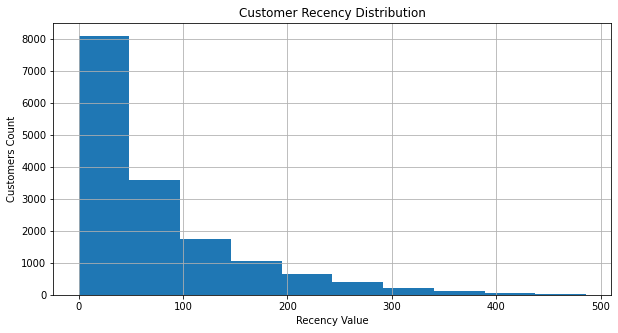

In [408]:
customer_recency.recency.hist(figsize=(10,5));
plt.title('Customer Recency Distribution');
plt.xlabel('Recency Value');
plt.ylabel('Customers Count');

In [409]:
clusterd_customer_recency = create_clusters(clusters_num=4, target_field_name='recency', df=customer_recency,ascending=False)
clusterd_customer_recency.head()

,cust_id,recency,recency_cluster
0,25656382424241000719757931970560.0,138.0,1
1,0011e0d4e6b944f998e987f904e8c1e5,234.0,1
2,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,1
3,005500a7188546ff8a767329a2f7c76a,222.0,1
4,00b18b535d6d4f779dea4dc9ac451478,174.0,1


In [410]:
clusterd_customer_recency.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,840.0,310.850000,57.075375,246.0,264.0,294.0,342.0,486.0
1,2055.0,179.383942,29.914387,138.0,156.0,174.0,204.0,240.0
2,4389.0,88.559125,21.808355,60.0,72.0,84.0,108.0,132.0
3,8704.0,25.022978,15.987713,0.0,12.0,24.0,36.0,54.0


##**Frequency**

In [411]:
def calculate_frequency(transactions):
    '''
        This method calculates a customer frequency score based on the number of transactions
        Args:
            transaction(pd.DataFrame): dataframe containing the customers transactions
        Returns:
            Frequency dataframe for each customer
    '''
    #get the last transaction 
    tx_frequency = transactions.groupby('cust_id').amount.count().reset_index()
    tx_frequency.columns = ['cust_id','frequency']
    
    return tx_frequency

In [412]:
customer_fq = calculate_frequency(transactions)
customer_fq.head()

,cust_id,frequency
0,25656382424241000719757931970560.0,2
1,0009655768c64bdeb2e877511632db8f,2
2,00116118485d4dfda04fdbaba9a87b5c,3
3,0011e0d4e6b944f998e987f904e8c1e5,2
4,0020c2b971eb4e9188eac86d93036a77,4


In [413]:
# determine the frequency for a particular cust_id
customer_fq.loc[customer_fq['cust_id'] == '00116118485d4dfda04fdbaba9a87b5c']

,cust_id,frequency
2,00116118485d4dfda04fdbaba9a87b5c,3


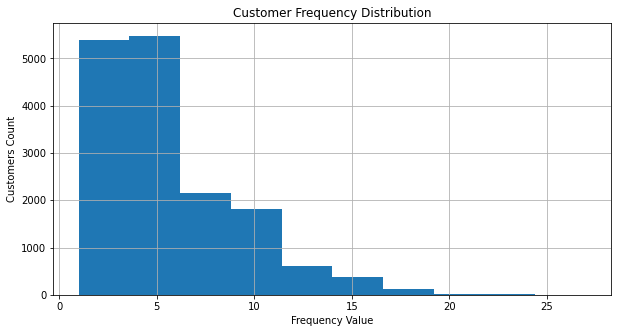

In [414]:
customer_fq.frequency.hist(figsize=(10,5))
plt.title('Customer Frequency Distribution');
plt.xlabel('Frequency Value');
plt.ylabel('Customers Count');

In [415]:
# create ordered clusters of the customer frequency
clusterd_customer_fq = create_clusters(clusters_num=4, target_field_name='frequency', df=customer_fq,ascending=True)
clusterd_customer_fq.head()

,cust_id,frequency,frequency_cluster
0,25656382424241000719757931970560.0,2,0
1,0009655768c64bdeb2e877511632db8f,2,0
2,00116118485d4dfda04fdbaba9a87b5c,3,0
3,0011e0d4e6b944f998e987f904e8c1e5,2,0
4,0020c2b971eb4e9188eac86d93036a77,4,0


In [416]:
# determine the frequency for a particular cust_id
clusterd_customer_fq.loc[clusterd_customer_fq['cust_id'] == '00116118485d4dfda04fdbaba9a87b5c']

,cust_id,frequency,frequency_cluster
2,00116118485d4dfda04fdbaba9a87b5c,3,0


In [417]:
clusterd_customer_fq.frequency_cluster.value_counts()

0    7525
1    4529
2    2790
3    1144
Name: frequency_cluster, dtype: int64

##**Monetary**

In [418]:
def calculate_revenue(transactions):
    '''
        This method calculates a customer revenue score based on the amount of transactions
        Args:
            transaction(pd.DataFrame): dataframe containing the customers transactions
        Returns:
            Revenue dataframe for each customer
    '''
    #get the last transaction 
    tx_revenue = transactions.groupby('cust_id').amount.sum().reset_index()
    tx_revenue.columns = ['cust_id','revenue']
    
    return tx_revenue

In [419]:
customer_revenue=calculate_revenue(transactions)
customer_revenue.head()

,cust_id,revenue
0,25656382424241000719757931970560.0,26.18
1,0009655768c64bdeb2e877511632db8f,30.73
2,00116118485d4dfda04fdbaba9a87b5c,4.09
3,0011e0d4e6b944f998e987f904e8c1e5,25.42
4,0020c2b971eb4e9188eac86d93036a77,98.33


In [420]:
customer_revenue.loc[customer_revenue['cust_id']=='0009655768c64bdeb2e877511632db8f']

,cust_id,revenue
1,0009655768c64bdeb2e877511632db8f,30.73


In [421]:
# create ordered clusters of the customer frequency
clusterd_customer_revenue = create_clusters(clusters_num=4, target_field_name='revenue', df=customer_revenue,ascending=True)
clusterd_customer_revenue.head()

,cust_id,revenue,revenue_cluster
0,25656382424241000719757931970560.0,26.18,0
1,0009655768c64bdeb2e877511632db8f,30.73,0
2,00116118485d4dfda04fdbaba9a87b5c,4.09,0
3,0011e0d4e6b944f998e987f904e8c1e5,25.42,0
4,003d66b6608740288d6cc97a6903f4f0,27.39,0


In [422]:
# determine the cluster for a particular customer_id
clusterd_customer_revenue.loc[clusterd_customer_revenue['cust_id']=='0009655768c64bdeb2e877511632db8f']

,cust_id,revenue,revenue_cluster
1,0009655768c64bdeb2e877511632db8f,30.73,0


In [423]:
# merge the dataframes 
combined_rfm = pd.merge(clusterd_customer_revenue, clusterd_customer_recency, on='cust_id')
combined_rfm.head()

,cust_id,revenue,revenue_cluster,recency,recency_cluster
0,25656382424241000719757931970560.0,26.18,0,138.0,1
1,0009655768c64bdeb2e877511632db8f,30.73,0,72.0,2
2,00116118485d4dfda04fdbaba9a87b5c,4.09,0,12.0,3
3,0011e0d4e6b944f998e987f904e8c1e5,25.42,0,234.0,1
4,003d66b6608740288d6cc97a6903f4f0,27.39,0,6.0,3


In [424]:
combined_rfm=pd.merge(combined_rfm,clusterd_customer_fq,on='cust_id')
combined_rfm.head()

,cust_id,revenue,revenue_cluster,recency,recency_cluster,frequency,frequency_cluster
0,25656382424241000719757931970560.0,26.18,0,138.0,1,2,0
1,0009655768c64bdeb2e877511632db8f,30.73,0,72.0,2,2,0
2,00116118485d4dfda04fdbaba9a87b5c,4.09,0,12.0,3,3,0
3,0011e0d4e6b944f998e987f904e8c1e5,25.42,0,234.0,1,2,0
4,003d66b6608740288d6cc97a6903f4f0,27.39,0,6.0,3,12,3


In [425]:
combined_rfm['overall_score']=combined_rfm['recency_cluster']+combined_rfm['frequency_cluster']+combined_rfm['revenue_cluster']

In [426]:
combined_rfm.head()

,cust_id,revenue,revenue_cluster,recency,recency_cluster,frequency,frequency_cluster,overall_score
0,25656382424241000719757931970560.0,26.18,0,138.0,1,2,0,1
1,0009655768c64bdeb2e877511632db8f,30.73,0,72.0,2,2,0,2
2,00116118485d4dfda04fdbaba9a87b5c,4.09,0,12.0,3,3,0,3
3,0011e0d4e6b944f998e987f904e8c1e5,25.42,0,234.0,1,2,0,1
4,003d66b6608740288d6cc97a6903f4f0,27.39,0,6.0,3,12,3,6


In [427]:
## Get the overall score for the customer_segment

combined_rfm.groupby('overall_score')['recency','frequency','revenue'].mean()

,recency,frequency,revenue
overall_score,,,
0,316.031655,1.775540,18.533468
1,190.186837,2.357396,24.131323
2,109.782313,2.960998,29.233247
3,57.926951,3.584389,37.606486
4,48.489881,5.544662,61.236814
5,35.354373,7.430418,87.970061
6,30.372388,10.120963,123.487004
7,25.127148,10.877434,198.964009
8,21.936306,13.343949,299.317166


In [428]:
# create customer_segments 

combined_rfm['RFM_segement'] = pd.qcut(combined_rfm['overall_score'], 3, labels=['Low-Value','Mid-Value', 'High-Value' ])
combined_rfm.head()

,cust_id,revenue,revenue_cluster,recency,recency_cluster,frequency,frequency_cluster,overall_score,RFM_segement
0,25656382424241000719757931970560.0,26.18,0,138.0,1,2,0,1,Low-Value
1,0009655768c64bdeb2e877511632db8f,30.73,0,72.0,2,2,0,2,Low-Value
2,00116118485d4dfda04fdbaba9a87b5c,4.09,0,12.0,3,3,0,3,Low-Value
3,0011e0d4e6b944f998e987f904e8c1e5,25.42,0,234.0,1,2,0,1,Low-Value
4,003d66b6608740288d6cc97a6903f4f0,27.39,0,6.0,3,12,3,6,High-Value


In [429]:
#check a particular instances of cust_id

combined_rfm.loc[combined_rfm['cust_id']=='0009655768c64bdeb2e877511632db8f']

,cust_id,revenue,revenue_cluster,recency,recency_cluster,frequency,frequency_cluster,overall_score,RFM_segement
1,0009655768c64bdeb2e877511632db8f,30.73,0,72.0,2,2,0,2,Low-Value


In [430]:
combined_rfm.shape


(15988, 9)

In [431]:
combined_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 15987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cust_id            15988 non-null  object  
 1   revenue            15988 non-null  float64 
 2   revenue_cluster    15988 non-null  int64   
 3   recency            15988 non-null  float64 
 4   recency_cluster    15988 non-null  int64   
 5   frequency          15988 non-null  int64   
 6   frequency_cluster  15988 non-null  int64   
 7   overall_score      15988 non-null  int64   
 8   RFM_segement       15988 non-null  category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [432]:
combined_rfm.isna().sum()

cust_id              0
revenue              0
revenue_cluster      0
recency              0
recency_cluster      0
frequency            0
frequency_cluster    0
overall_score        0
RFM_segement         0
dtype: int64

In [433]:
# final transaction dataframe 
final_transactions_df = pd.merge(customers_transactions_df, combined_rfm, on='cust_id', how='inner')
final_transactions_df.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,completed_offer,segment,revenue,revenue_cluster,recency,recency_cluster,frequency,frequency_cluster,overall_score,RFM_segement
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,1,TR,26.18,0,138.0,1,2,0,1,Low-Value
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,1,TR,26.18,0,138.0,1,2,0,1,Low-Value
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,0,CN,26.18,0,138.0,1,2,0,1,Low-Value
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,1,TR,30.73,0,72.0,2,2,0,2,Low-Value
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,1,TR,30.73,0,72.0,2,2,0,2,Low-Value


In [434]:
final_transactions_df.shape

(47889, 38)

In [435]:
final_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47889 entries, 0 to 47888
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   cust_id                      47889 non-null  object  
 1   time_received                47889 non-null  float64 
 2   reward                       47889 non-null  float64 
 3   offer_id                     47889 non-null  object  
 4   difficulty                   47889 non-null  float64 
 5   offer_type                   47889 non-null  object  
 6   email                        47889 non-null  float64 
 7   mobile                       47889 non-null  float64 
 8   social                       47889 non-null  float64 
 9   web                          47889 non-null  float64 
 10  Duration                     47889 non-null  float64 
 11  offer_alias                  47889 non-null  object  
 12  expected_finish              47889 non-null  float64 
 13  c

In [436]:
# Checking is there any null value
final_transactions_df.isna().sum()

cust_id                            0
time_received                      0
reward                             0
offer_id                           0
difficulty                         0
offer_type                         0
email                              0
mobile                             0
social                             0
web                                0
Duration                           0
offer_alias                        0
expected_finish                    0
completed                          0
finish                             0
viewed                             0
success                            0
view_time                      14852
completed_not_viewed               0
total_spent_offer                  0
total_spent_non_offer              0
profit                             0
total_spent                        0
num_bogo_completed                 0
num_discount_completed             0
num_informational_completed        0
successful_offers                  0
n

In [437]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cust_id                    14825 non-null  object        
 1   gender                     14825 non-null  object        
 2   age                        14825 non-null  int64         
 3   income                     14825 non-null  int64         
 4   days_as_member             14825 non-null  int64         
 5   signup_date                14825 non-null  datetime64[ns]
 6   year                       14825 non-null  int64         
 7   month                      14825 non-null  int64         
 8   day                        14825 non-null  object        
 9   member_since_how_manydays  14825 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.1+ MB


In [438]:
profile_df.isna().sum()

cust_id                      0
gender                       0
age                          0
income                       0
days_as_member               0
signup_date                  0
year                         0
month                        0
day                          0
member_since_how_manydays    0
dtype: int64

In [441]:
# combine the cleaned profile with the final transactions data frame

offers_tx_profile_merged = final_transactions_df.merge(profile_df,on='cust_id', how='left')
offers_tx_profile_merged.tail(10)

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,RFM_segement,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
47879,fff7576017104bcc8677a8d63322b5e1,168.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,bogo,1.0,1.0,1.0,1.0,...,Low-Value,M,71.0,73000.0,1122.0,2017-10-31,2017.0,10.0,Tuesday,1901.0
47880,fff7576017104bcc8677a8d63322b5e1,408.0,0.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,bogo,1.0,1.0,1.0,0.0,...,Low-Value,M,71.0,73000.0,1122.0,2017-10-31,2017.0,10.0,Tuesday,1901.0
47881,fff8957ea8b240a6b5e634b6ee8eafcf,408.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,10.0,discount,1.0,1.0,1.0,1.0,...,Low-Value,M,71.0,56000.0,1012.0,2018-02-18,2018.0,2.0,Sunday,1791.0
47882,fffad4f4828548d1b5583907f2e9906b,0.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,bogo,1.0,1.0,1.0,1.0,...,Mid-Value,M,34.0,34000.0,1403.0,2017-01-23,2017.0,1.0,Monday,2182.0
47883,fffad4f4828548d1b5583907f2e9906b,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,Mid-Value,M,34.0,34000.0,1403.0,2017-01-23,2017.0,1.0,Monday,2182.0
47884,fffad4f4828548d1b5583907f2e9906b,408.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,bogo,1.0,1.0,1.0,1.0,...,Mid-Value,M,34.0,34000.0,1403.0,2017-01-23,2017.0,1.0,Monday,2182.0
47885,ffff82501cea40309d5fdd7edcca4a07,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,10.0,discount,1.0,1.0,1.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0
47886,ffff82501cea40309d5fdd7edcca4a07,168.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,discount,1.0,0.0,0.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0
47887,ffff82501cea40309d5fdd7edcca4a07,336.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0
47888,ffff82501cea40309d5fdd7edcca4a07,408.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0


In [442]:
offers_tx_profile_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47889 entries, 0 to 47888
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   cust_id                      47889 non-null  object        
 1   time_received                47889 non-null  float64       
 2   reward                       47889 non-null  float64       
 3   offer_id                     47889 non-null  object        
 4   difficulty                   47889 non-null  float64       
 5   offer_type                   47889 non-null  object        
 6   email                        47889 non-null  float64       
 7   mobile                       47889 non-null  float64       
 8   social                       47889 non-null  float64       
 9   web                          47889 non-null  float64       
 10  Duration                     47889 non-null  float64       
 11  offer_alias                  47889 non-nu

In [443]:
# fill nan with 0 for viewtime column
offers_tx_profile_merged['view_time'].fillna(0, inplace=True)
offers_tx_profile_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47889 entries, 0 to 47888
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   cust_id                      47889 non-null  object        
 1   time_received                47889 non-null  float64       
 2   reward                       47889 non-null  float64       
 3   offer_id                     47889 non-null  object        
 4   difficulty                   47889 non-null  float64       
 5   offer_type                   47889 non-null  object        
 6   email                        47889 non-null  float64       
 7   mobile                       47889 non-null  float64       
 8   social                       47889 non-null  float64       
 9   web                          47889 non-null  float64       
 10  Duration                     47889 non-null  float64       
 11  offer_alias                  47889 non-nu

In [444]:
offers_tx_profile_merged.gender.value_counts()

M    24048
F    17308
O      586
Name: gender, dtype: int64

In [445]:
offers_tx_profile_merged.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,RFM_segement,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,Low-Value,M,33.0,72000.0,1315.0,2017-04-21,2017.0,4.0,Friday,2094.0
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,Low-Value,M,33.0,72000.0,1315.0,2017-04-21,2017.0,4.0,Friday,2094.0


In [446]:
offers_tx_profile_merged.to_csv('analyzed_tx_offers_RFM_profile.csv', index = None, header=True)

In [447]:
offers_tx_profile_merged.loc[offers_tx_profile_merged['cust_id']=='0610b486422d4921ae7d2bf64640c50b']

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,RFM_segement,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
1134,0610b486422d4921ae7d2bf64640c50b,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,Low-Value,F,55.0,112000.0,1230.0,2017-07-15,2017.0,7.0,Saturday,2009.0


In [449]:
offers_tx_profile_merged=offers_tx_profile_merged.dropna()

In [451]:
offers_tx_profile_merged.reset_index(drop=True)

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,RFM_segement,gender,age,income,days_as_member,signup_date,year,month,day,member_since_how_manydays
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,Low-Value,M,58.0,63000.0,2487.0,2014-02-04,2014.0,2.0,Tuesday,3266.0
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,Low-Value,M,33.0,72000.0,1315.0,2017-04-21,2017.0,4.0,Friday,2094.0
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,Low-Value,M,33.0,72000.0,1315.0,2017-04-21,2017.0,4.0,Friday,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41937,fffad4f4828548d1b5583907f2e9906b,408.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,bogo,1.0,1.0,1.0,1.0,...,Mid-Value,M,34.0,34000.0,1403.0,2017-01-23,2017.0,1.0,Monday,2182.0
41938,ffff82501cea40309d5fdd7edcca4a07,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,10.0,discount,1.0,1.0,1.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0
41939,ffff82501cea40309d5fdd7edcca4a07,168.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,discount,1.0,0.0,0.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0
41940,ffff82501cea40309d5fdd7edcca4a07,336.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,High-Value,F,45.0,62000.0,1462.0,2016-11-25,2016.0,11.0,Friday,2241.0


In [452]:
categorical_columns_to_handle = ['gender', 'RFM_segement']
offers_tx_profile_merged_categorical = pd.get_dummies(data= offers_tx_profile_merged,columns=categorical_columns_to_handle)
offers_tx_profile_merged_categorical.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,year,month,day,member_since_how_manydays,gender_F,gender_M,gender_O,RFM_segement_Low-Value,RFM_segement_Mid-Value,RFM_segement_High-Value
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,2017.0,4.0,Friday,2094.0,0,1,0,1,0,0
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,2017.0,4.0,Friday,2094.0,0,1,0,1,0,0


In [453]:
# map the segment as follows: TR --> 0, CR --> 1, TN -->3, CN-->3
segment_dict = {'TR':0, 'CR':1, 'TN':2, 'CN':3}
offers_tx_profile_merged_categorical.segment.replace(segment_dict, inplace=True)
offers_tx_profile_merged_categorical.head()

,cust_id,time_received,reward,offer_id,difficulty,offer_type,email,mobile,social,web,...,year,month,day,member_since_how_manydays,gender_F,gender_M,gender_O,RFM_segement_Low-Value,RFM_segement_Mid-Value,RFM_segement_High-Value
0,25656382424241000719757931970560.0,168.0,0.0,2906b810c7d4411798c6938adc9daaa5,10.0,discount,1.0,1.0,0.0,1.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
1,25656382424241000719757931970560.0,336.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
2,25656382424241000719757931970560.0,408.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,bogo,1.0,1.0,0.0,1.0,...,2014.0,2.0,Tuesday,3266.0,0,1,0,1,0,0
3,0009655768c64bdeb2e877511632db8f,168.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,informational,1.0,1.0,1.0,0.0,...,2017.0,4.0,Friday,2094.0,0,1,0,1,0,0
4,0009655768c64bdeb2e877511632db8f,336.0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,informational,1.0,1.0,0.0,1.0,...,2017.0,4.0,Friday,2094.0,0,1,0,1,0,0


In [454]:
offers_tx_profile_merged_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41942 entries, 0 to 47888
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   cust_id                      41942 non-null  object        
 1   time_received                41942 non-null  float64       
 2   reward                       41942 non-null  float64       
 3   offer_id                     41942 non-null  object        
 4   difficulty                   41942 non-null  float64       
 5   offer_type                   41942 non-null  object        
 6   email                        41942 non-null  float64       
 7   mobile                       41942 non-null  float64       
 8   social                       41942 non-null  float64       
 9   web                          41942 non-null  float64       
 10  Duration                     41942 non-null  float64       
 11  offer_alias                  41942 non-nu

In [459]:
exploration_df=offers_tx_profile_merged.copy()

In [460]:
exploration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41942 entries, 0 to 47888
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   cust_id                      41942 non-null  object        
 1   time_received                41942 non-null  float64       
 2   reward                       41942 non-null  float64       
 3   offer_id                     41942 non-null  object        
 4   difficulty                   41942 non-null  float64       
 5   offer_type                   41942 non-null  object        
 6   email                        41942 non-null  float64       
 7   mobile                       41942 non-null  float64       
 8   social                       41942 non-null  float64       
 9   web                          41942 non-null  float64       
 10  Duration                     41942 non-null  float64       
 11  offer_alias                  41942 non-nu

In [462]:
exploration_df.gender.value_counts()

M    24048
F    17308
O      586
Name: gender, dtype: int64

In [463]:
exploration_df.RFM_segement.value_counts()

Low-Value     18334
Mid-Value     14634
High-Value     8974
Name: RFM_segement, dtype: int64

##**RFM Distribution**

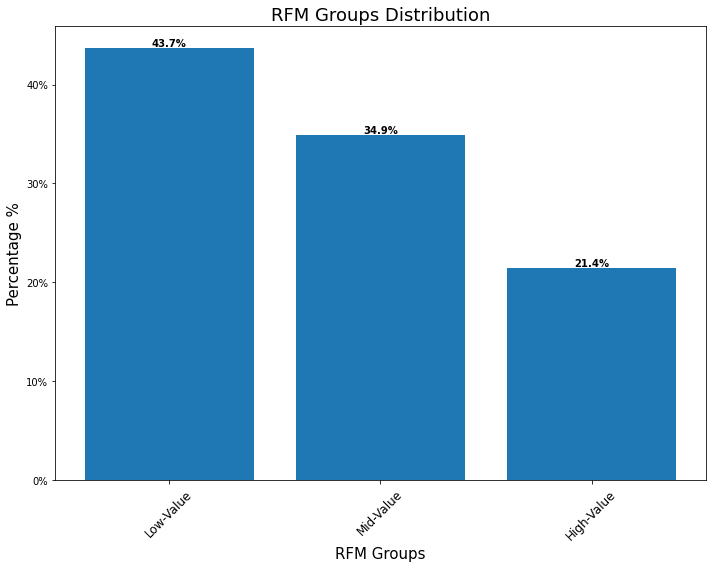

In [470]:

data=((exploration_df.RFM_segement.value_counts()/exploration_df.RFM_segement.value_counts().sum())* 100).round(1)

plt.figure(figsize = (10, 8))
yticklabels = [str(y) + '%' for y in np.arange(0,50,10)]
plt.yticks(np.arange(0,50,10), labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('RFM Groups', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('RFM Groups Distribution', fontsize = 18)

bar_plot = plt.bar(x = data.index.values, height = data)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(data[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

##**Customer groups distribution**

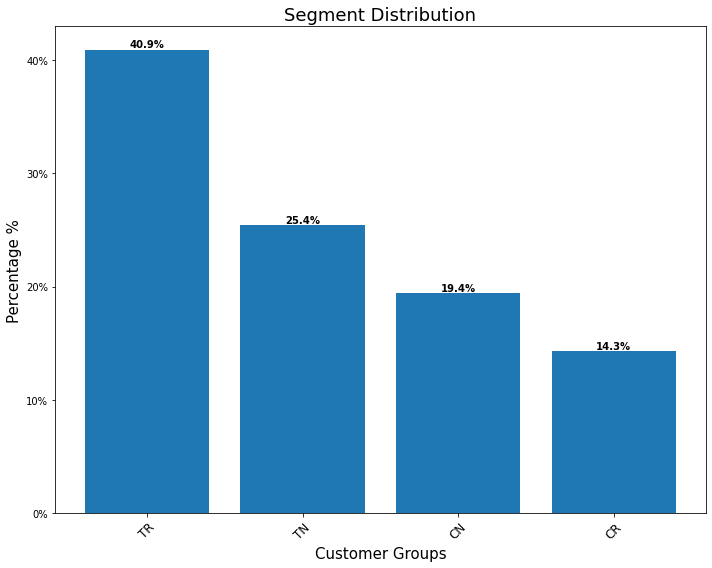

In [474]:

data=((exploration_df.segment.value_counts()/exploration_df.segment.value_counts().sum())* 100).round(1)

plt.figure(figsize = (10, 8))
yticklabels = [str(y) + '%' for y in np.arange(0,50,10)]
plt.yticks(np.arange(0,50,10), labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Customer Groups', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Segment Distribution', fontsize = 18)

bar_plot = plt.bar(x = data.index.values, height = data)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(data[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

##**Summary**

- 40% of the customers are in the Treatment response group
- CR had 14.9% of the customers

In [478]:
exploration_df.offer_alias.value_counts()

C    4252
H    4230
J    4209
I    4203
E    4194
F    4194
G    4176
A    4165
B    4164
D    4155
Name: offer_alias, dtype: int64

##**Demographics of RFM segments such as:**
- Age groups
- Income groups
- Gender

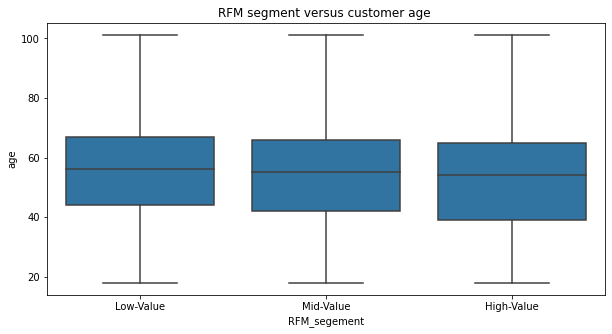

In [482]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data = exploration_df, y = 'age', x = 'RFM_segement', color = base_color);
plt.title('RFM segment versus customer age ');
exploration_df.groupby('RFM_segement');

**the age is not a factor in the RFM segment it seems. though the RFM segment with low value seem to contain the smallest age group from 48 - 64 (quratile range)**

##**Purchasing behavior in RFM clusters:**
- Total Spent
- Profit
- Number of completed offers
- Segment (TR, TN, CR, CN) 

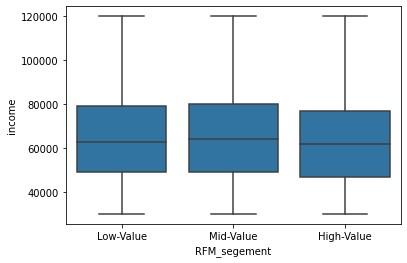

In [483]:
sns.boxplot(data = exploration_df, y = 'income', x = 'RFM_segement', color = base_color);

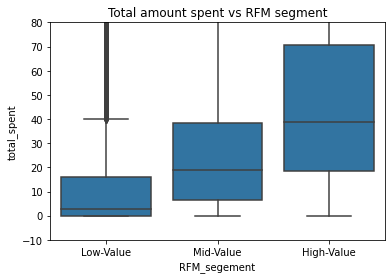

In [484]:
# total spent vs RFM segment
sns.boxplot(data = exploration_df, y = 'total_spent', x = 'RFM_segement', color = base_color);
plt.title('Total amount spent vs RFM segment');
plt.ylim((-10,80));

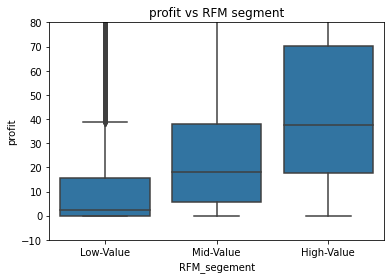

In [485]:
sns.boxplot(data = exploration_df, y = 'profit', x = 'RFM_segement', color = base_color);
plt.title('profit vs RFM segment');
plt.ylim((-10,80));

In [495]:
# Customer segments vs RFM clusters 
exploration_df.groupby(['RFM_segement', 'segment']).size() /exploration_df.groupby(['RFM_segement']).size()

RFM_segement  segment
Low-Value     CN         0.276154
              CR         0.102378
              TN         0.382950
              TR         0.238519
Mid-Value     CN         0.162020
              CR         0.161063
              TN         0.189969
              TR         0.486948
High-Value    CN         0.078895
              CR         0.195788
              TN         0.096278
              TR         0.629039
dtype: float64

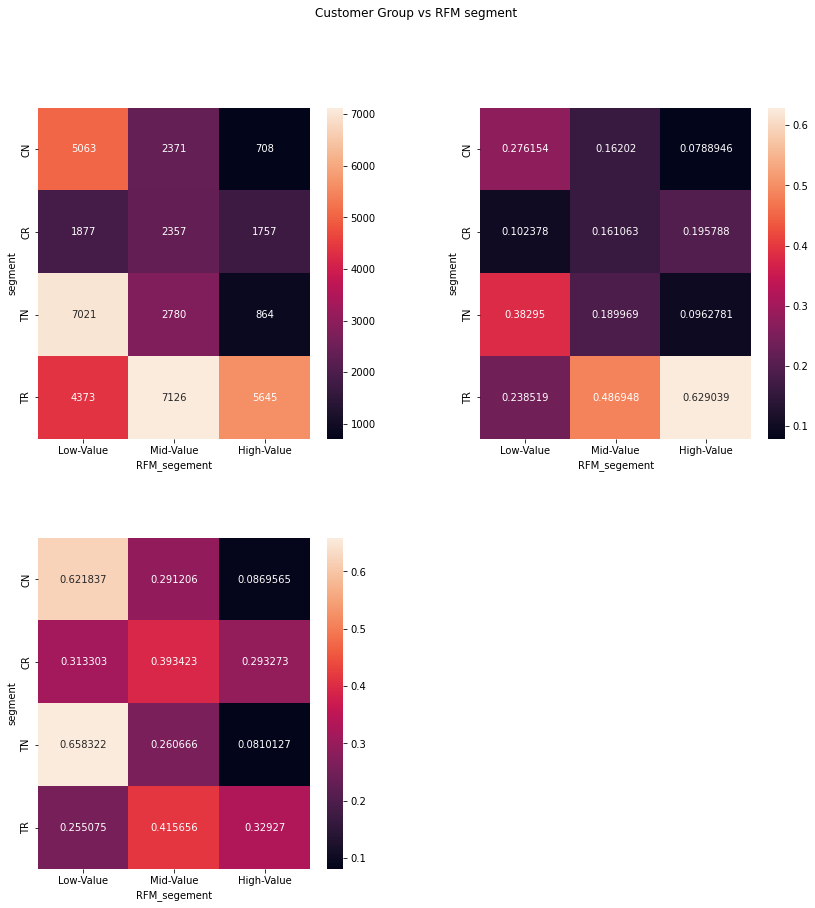

In [496]:
#  Segment (TR, TN, CR, CN) vs RFM
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=.3, wspace = 0.3)

plt.subplot(2, 2, 1)
ct_counts = exploration_df.groupby(['RFM_segement', 'segment']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'segment', columns = 'RFM_segement', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'g');

plt.subplot(2, 2, 2)
ct_counts = exploration_df.groupby(['RFM_segement', 'segment']).size()/exploration_df.groupby([ 'RFM_segement']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'segment', columns = 'RFM_segement', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'g');

plt.subplot(2, 2, 3)
ct_counts = exploration_df.groupby(['RFM_segement', 'segment']).size()/exploration_df.groupby([ 'segment']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'segment', columns = 'RFM_segement', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'g');

fig.suptitle('Customer Group vs RFM segment');

In terms of the segments the RFM clusters are distributed as follows:

- CN comprise of 56% of the Low value RFM clusters segments, followed by Mid value RFM clusters.
- CR mostly in the Mid Value segment with 38.5% followed by 33.7% in the high value RFM cluster.
- TN comprise of 62% low value RFM clusters. and below 10% from the high value RFM cluster.
- TR: highest portion comes from the mid value RFM cluster with 40% followed by high value with 35.6%

Compring with respect to the RFM cluster:

-  Low value have 42% in the TN segment and similar percentages for CN and TR.
- Mid Value RFM cluster comprise of 40% for the TR segment which is double the other RFM clusters.
- High Value comprise of 60% of TR then 44% of Mid value Customers.

The above observations make sense since the high-value customers are the ones who are most frequent, spent the most and had the most recent interactions. This indicates that high and mid-value customers are responsive to targeted marketing while it did not make a difference in the Low values.

Next, I will compared the number of compelted offers across different segments.

In [486]:
exploration_df['num_completed_offers'] = exploration_df['num_informational_completed'] + exploration_df['num_discount_completed'] + exploration_df['num_bogo_completed']

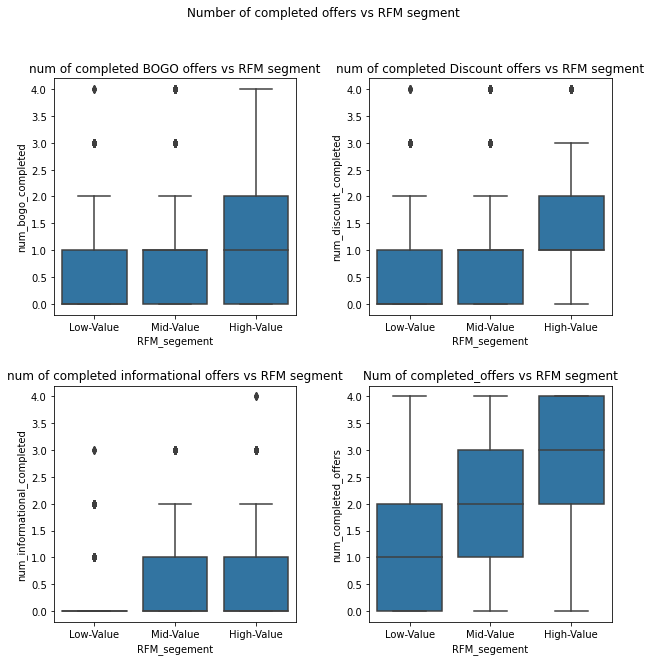

In [487]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.3, wspace = 0.3)

plt.subplot(2, 2, 1)
sns.boxplot(data = exploration_df, y = 'num_bogo_completed', x = 'RFM_segement', color = base_color);
plt.title('num of completed BOGO offers vs RFM segment');

plt.subplot(2, 2, 2)
sns.boxplot(data = exploration_df, y = 'num_discount_completed', x = 'RFM_segement', color = base_color);
plt.title('num of completed Discount offers vs RFM segment');

plt.subplot(2, 2, 3)
sns.boxplot(data = exploration_df, y = 'num_informational_completed', x = 'RFM_segement', color = base_color);
plt.title('num of completed informational offers vs RFM segment');


plt.subplot(2, 2, 4)
sns.boxplot(data = exploration_df, y = 'num_completed_offers', x = 'RFM_segement', color = base_color);
plt.title('Num of completed_offers vs RFM segment');

fig.suptitle('Number of completed offers vs RFM segment');

**As expected the number of completed offers for the High value Cluster is the highest compared followed by mid value and RFM clusters.**

##**Customer group vs demographic**

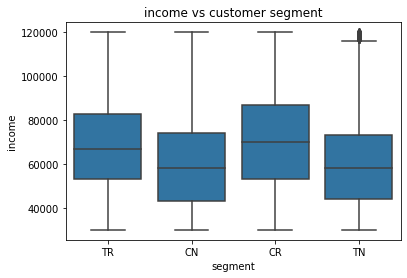

In [488]:
# income vs segment 
sns.boxplot(data = exploration_df, y = 'income', x = 'segment', color = base_color);
plt.title('income vs customer segment');

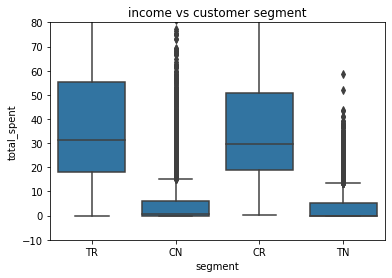

In [489]:
# total spent vs customer segment
sns.boxplot(data = exploration_df, y = 'total_spent', x = 'segment', color = base_color);
plt.title('income vs customer segment');
plt.ylim((-10,80));

**The difference in the amount of money spent between the treatment and control groups is significant. The highest spent value amount of value spent in TN and CN groups are less than the lower limit of the TR and CR groups**

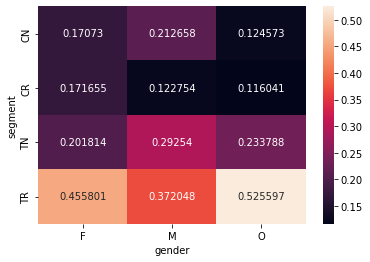

In [490]:
ct_counts = exploration_df.groupby(['gender', 'segment']).size()/exploration_df.groupby([ 'gender']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'segment', columns = 'gender', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'g');

**We Can observe that the highest percentage of Others and females is in the TR group. the Males have equal percentages of TN groups.**

<Figure size 720x720 with 0 Axes>

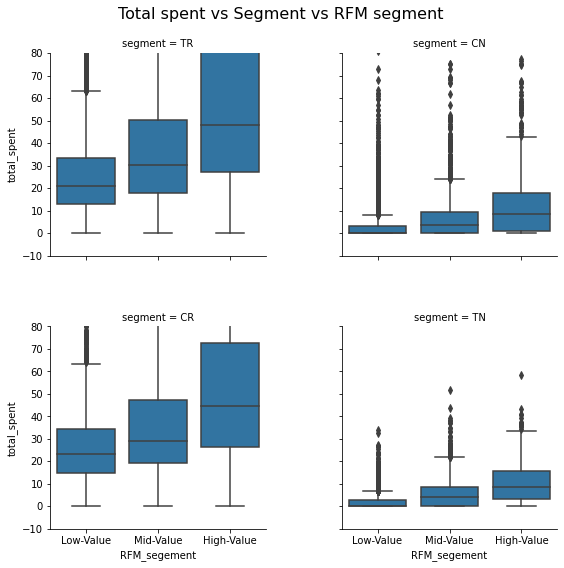

In [491]:

# total spent vs RFM vs cluster -->
fig = plt.figure(figsize=(10,10));
g = sns.FacetGrid(data = exploration_df, col='segment', col_wrap=2, height =4);
(g.map(sns.boxplot, 'RFM_segement', 'total_spent')).fig.subplots_adjust(wspace=.35, hspace=.35);
plt.ylim((-10,80));
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Total spent vs Segment vs RFM segment', fontsize = 16);

**We can conclude that the TR and CR have the highest amount spent with the high value of RFM cluster having the highest amount spent. and they have similar range of money spent and this can be observed in the CN and TN groups**

<Figure size 720x720 with 0 Axes>

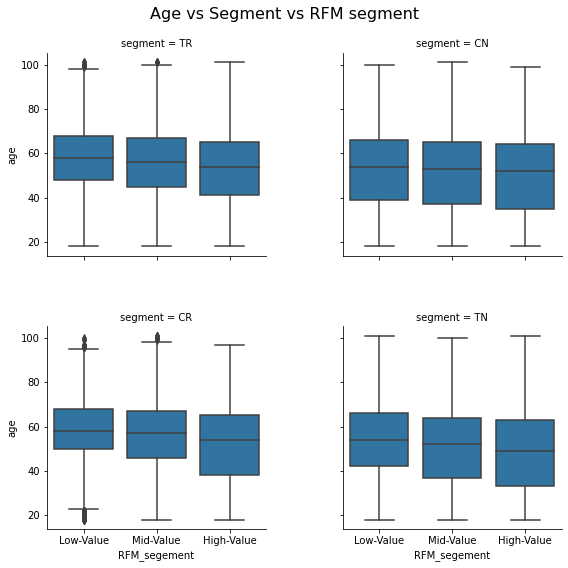

In [492]:
# Age vs RFM vs cluster -->
fig = plt.figure(figsize=(10,10));
g = sns.FacetGrid(data = exploration_df, col='segment', col_wrap=2, height =4);
(g.map(sns.boxplot, 'RFM_segement', 'age')).fig.subplots_adjust(wspace=.35, hspace=.35);
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Age vs Segment vs RFM segment', fontsize = 16);

**The age have similar trends across different customer segments. with the high valued RFM cluster having a wider range of age covered and the response groups both have higher age.**

<Figure size 720x720 with 0 Axes>

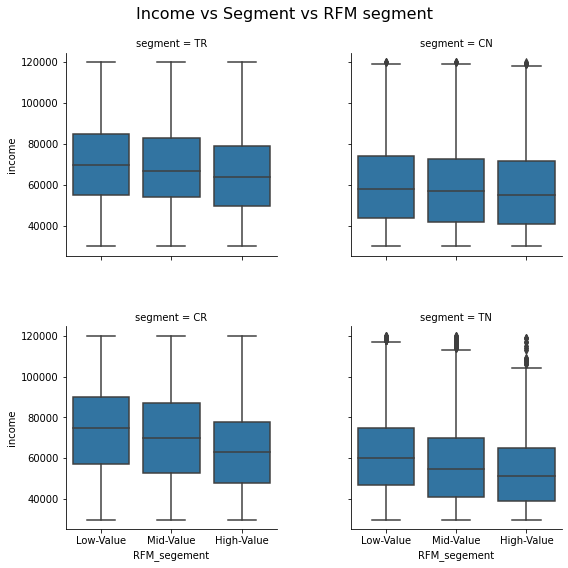

In [493]:
# income vs RFM vs cluster -->
fig = plt.figure(figsize=(10,10));
g = sns.FacetGrid(data = exploration_df, col='segment', col_wrap=2, height =4);
(g.map(sns.boxplot, 'RFM_segement', 'income')).fig.subplots_adjust(wspace=.35, hspace=.35);
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Income vs Segment vs RFM segment', fontsize = 16);

- The highest income can be found with the customers from the response groups such as TR and CR group.
- The highest income ranges is for CR customer group
lowest income range is for CN group 